=== 1. PRZYGOTOWANIE DANYCH ===
Dane przygotowane.
Rozmiar zbioru treningowego: (711, 8)
Rozmiar zbioru testowego: (178, 8)

=== 2. DRZEWO DECYZYJNE ===
Depth      Accuracy   Precision  Recall     F1        
-------------------------------------------------------
2          0.7640     0.7031     0.6618     0.6818
3          0.8146     0.8182     0.6618     0.7317
5          0.7640     0.7600     0.5588     0.6441
7          0.7416     0.6719     0.6324     0.6515
10         0.7528     0.6935     0.6324     0.6615
None       0.7472     0.6716     0.6618     0.6667

Najlepsze drzewo: max_depth=3 (Accuracy: 0.8146)


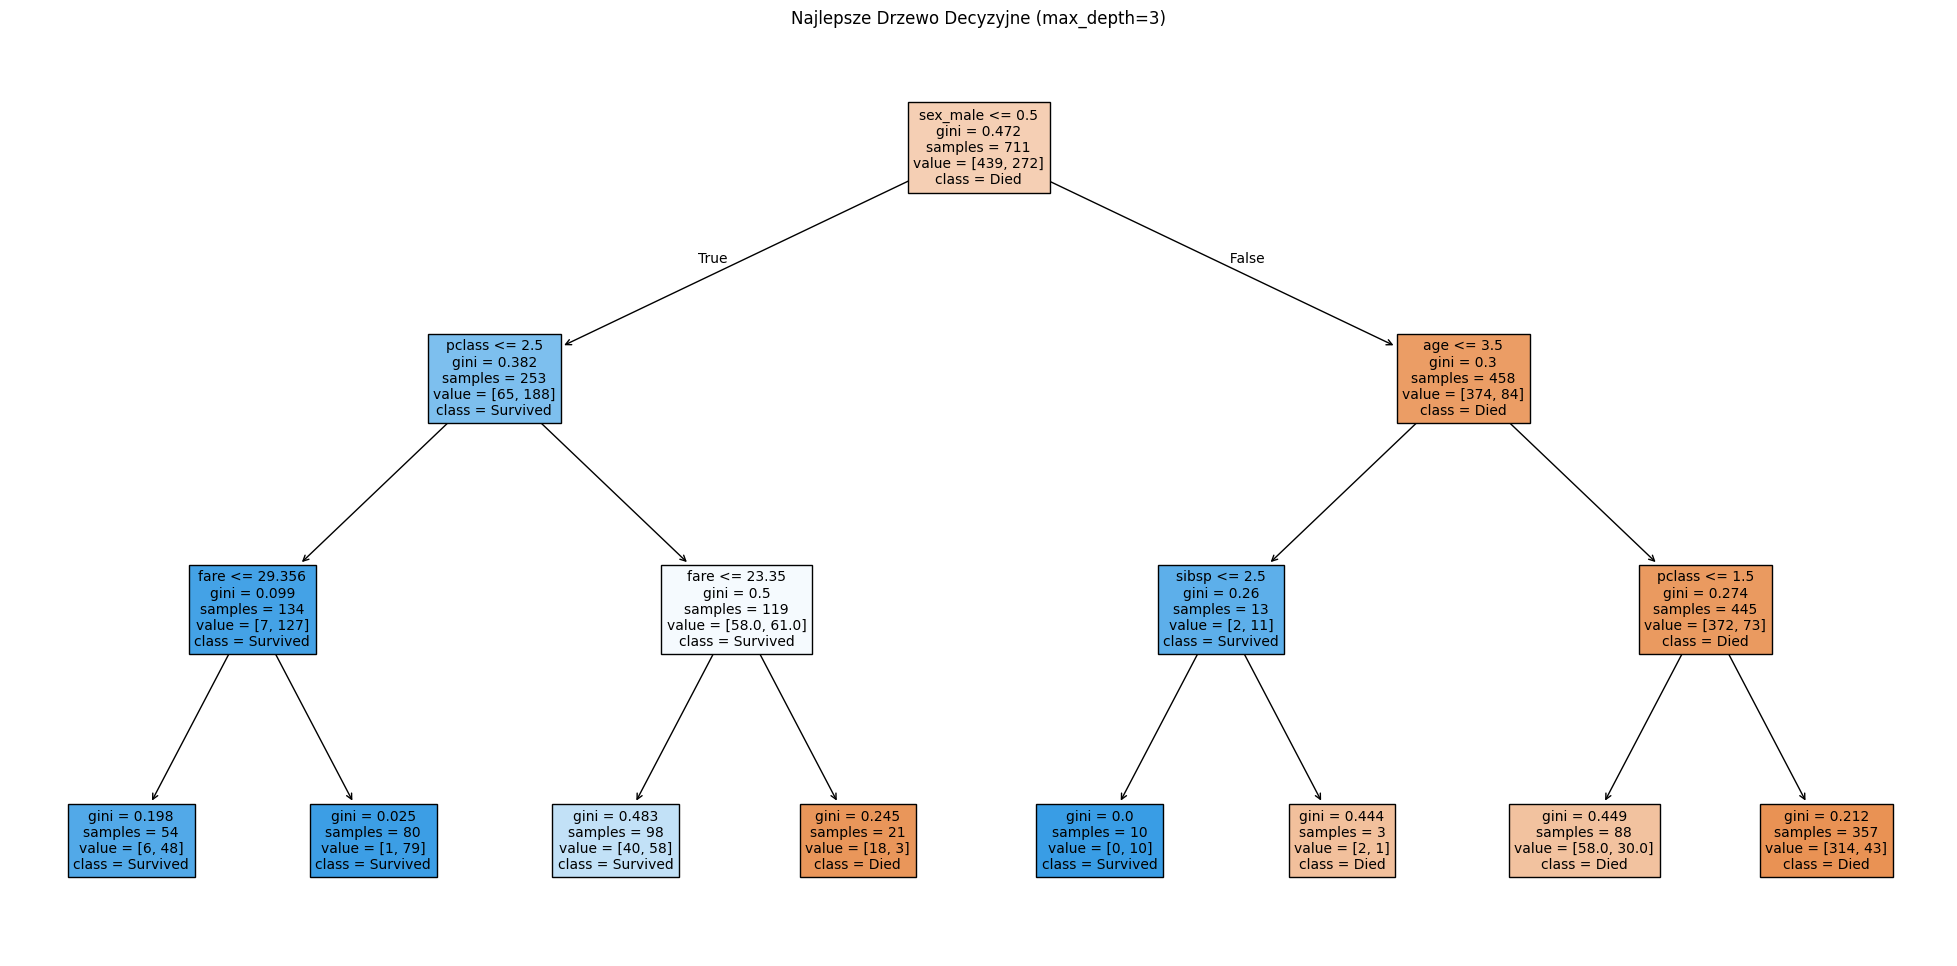


=== 3. KNN (K-Nearest Neighbors) ===
k          Accuracy  
--------------------
1          0.7472
3          0.7753
5          0.8090
7          0.7865
9          0.8146
11         0.8258
15         0.8371


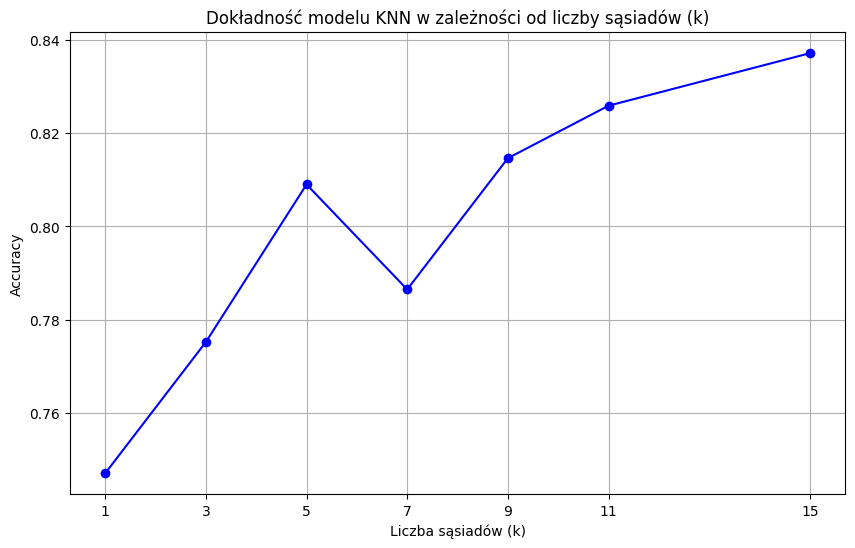

Najlepsze k dla KNN: 15 (Accuracy: 0.8371)

=== WNIOSKI ===
1. Najlepszy wynik Drzewa: 0.8146
2. Najlepszy wynik KNN:    0.8371
-> Wniosek: KNN poradził sobie lepiej (lub tak samo) w tym zadaniu.

Odpowiedzi na pytania z prezentacji:
- Zbyt małe max_depth: Model jest zbyt prosty (underfitting), niska dokładność.
- Zbyt duże max_depth: Model zapamiętuje dane treningowe (overfitting), słabo działa na testowych.
- Zbyt małe k (np. 1): Model jest bardzo wrażliwy na szum (outliery).
- Zbyt duże k: Model staje się zbyt ogólny, ignoruje lokalne wzorce.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ==========================================
# 1. PRZYGOTOWANIE DANYCH (Zgodnie z instrukcją)
# ==========================================
print("=== 1. PRZYGOTOWANIE DANYCH ===")

# Wczytanie zbioru Titanic
df = sns.load_dataset('titanic')

# Wybór cech zgodnie z treścią zadania
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'
df = df[features + [target]]

# Obsługa braków danych
# Wiek - uzupełniamy medianą
df['age'] = df['age'].fillna(df['age'].median())
# Embarked - usuwamy wiersze z brakami (tylko 2 takie wiersze)
df = df.dropna(subset=['embarked'])

# Kodowanie zmiennych kategorycznych (One-Hot Encoding)
# drop_first=True tworzy np. jedną kolumnę 'sex_male' (1=mężczyzna, 0=kobieta)
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Podział na cechy (X) i cel (y)
X = df_encoded.drop(target, axis=1)
y = df_encoded[target]

# Podział na zbiór treningowy i testowy (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dane przygotowane.")
print(f"Rozmiar zbioru treningowego: {X_train.shape}")
print(f"Rozmiar zbioru testowego: {X_test.shape}")


# ==========================================
# 2. DRZEWO DECYZYJNE - EKSPERYMENT
# ==========================================
print("\n=== 2. DRZEWO DECYZYJNE ===")

depths = [2, 3, 5, 7, 10, None]
results_tree = []

best_tree_model = None
best_tree_score = 0
best_depth = 0

print(f"{'Depth':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10}")
print("-" * 55)

for d in depths:
    # Trenowanie modelu
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)

    # Predykcja
    y_pred = clf.predict(X_test)

    # Obliczanie metryk
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Zapisywanie wyników (None zamieniamy na string dla czytelności)
    depth_label = str(d) if d is not None else "None"
    results_tree.append({'depth': depth_label, 'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1})

    print(f"{depth_label:<10} {acc:.4f}     {prec:.4f}     {rec:.4f}     {f1:.4f}")

    # Szukanie najlepszego modelu (wg Accuracy)
    if acc > best_tree_score:
        best_tree_score = acc
        best_tree_model = clf
        best_depth = depth_label

print(f"\nNajlepsze drzewo: max_depth={best_depth} (Accuracy: {best_tree_score:.4f})")

# Wizualizacja najlepszego drzewa


plt.figure(figsize=(25, 12))
plot_tree(best_tree_model, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True, fontsize=10)
plt.title(f"Najlepsze Drzewo Decyzyjne (max_depth={best_depth})")
plt.show()


# ==========================================
# 3. KNN (K-Nearest Neighbors) - EKSPERYMENT
# ==========================================
print("\n=== 3. KNN (K-Nearest Neighbors) ===")

# Normalizacja danych (Kluczowy krok dla KNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [1, 3, 5, 7, 9, 11, 15]
acc_scores_knn = []

print(f"{'k':<10} {'Accuracy':<10}")
print("-" * 20)

for k in k_values:
    # Trenowanie modelu
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Predykcja
    y_pred = knn.predict(X_test_scaled)

    # Metryka
    acc = accuracy_score(y_test, y_pred)
    acc_scores_knn.append(acc)

    print(f"{k:<10} {acc:.4f}")

# Wykres Accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, acc_scores_knn, marker='o', linestyle='-', color='blue')
plt.title('Dokładność modelu KNN w zależności od liczby sąsiadów (k)')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()

best_k = k_values[acc_scores_knn.index(max(acc_scores_knn))]
print(f"Najlepsze k dla KNN: {best_k} (Accuracy: {max(acc_scores_knn):.4f})")

# ==========================================
# PODSUMOWANIE I ODPOWIEDZI NA PYTANIA
# ==========================================
print("\n=== WNIOSKI ===")
print(f"1. Najlepszy wynik Drzewa: {best_tree_score:.4f}")
print(f"2. Najlepszy wynik KNN:    {max(acc_scores_knn):.4f}")

if best_tree_score > max(acc_scores_knn):
    print("-> Wniosek: Drzewo Decyzyjne poradziło sobie lepiej w tym zadaniu.")
else:
    print("-> Wniosek: KNN poradził sobie lepiej (lub tak samo) w tym zadaniu.")

print("\nOdpowiedzi na pytania z prezentacji:")
print("- Zbyt małe max_depth: Model jest zbyt prosty (underfitting), niska dokładność.")
print("- Zbyt duże max_depth: Model zapamiętuje dane treningowe (overfitting), słabo działa na testowych.")
print("- Zbyt małe k (np. 1): Model jest bardzo wrażliwy na szum (outliery).")
print("- Zbyt duże k: Model staje się zbyt ogólny, ignoruje lokalne wzorce.")